# Modified from heat18temps200-2017jan15.nb 

Purpose: From thermometer and multi-proxy estimates, merge temperature data differences from an estimate of 1961-1990 mean absolute temperature and find the 1650--1749 average, based on the references at the end of this notebook.

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
os.chdir('C:\\Users\\cd7\\Desktop\\Heat18Temperature')

In [2]:
df1 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat18Temperature\\GLB.Ts+dSST(1Jan2018).xlsx')
df1.to_csv('heat19GLB.csv',header=False,index=False)
df1 = pd.read_csv('heat19GLB.csv',skipfooter=1)

df2 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat18Temperature\\heat17decadalglobaltemp19oct200-1980.xlsx')
df2.to_csv('heat19decadal.csv',header=False,index=False)
df2 = pd.read_csv('heat19decadal.csv',skipfooter=1)

C:\Users\cd7\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cd7\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


In [3]:
out1 = 'heat'
out2 = 'warming'
out3 = '200-2017'
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name)
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-')
yrs = str(int(date_split[0])-2000)
seq = [out1, yrs, out2, date_split[2], months[int(date_split[1])-1],out3 ]
seperator = ','
filename = seperator.join(seq).replace(',', '')
print (filename)

heat20warming05apr200-2017


# Global Average Thermometer Data

Global average temperature direct measurements as deviations from 1951-1980 mean.
https://data.giss.nasa.gov/gistemp

In [4]:
thermoyrs = df1.iloc[:,0]
dec2017temp = df1.iloc[-1,:][11]*np.mean(df1.iloc[:,12][:-1].astype(float).div(df1.iloc[:,11][:-1].astype(float)))

In [5]:
dec2017temp

0.7664302149429327

Text(0, 0.5, '$^\\circ$C')

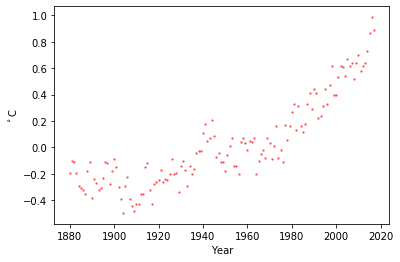

In [6]:
thermotemps = df1.iloc[:,13][:-1].append(pd.Series([np.mean(df1.iloc[-1,:][1:12].append(pd.Series([dec2017temp]), ignore_index=True))]), ignore_index=True)
thermotemps = thermotemps.astype(float)
plt.scatter(thermoyrs, thermotemps, s=2,color = 'red', alpha = 0.5,marker='o')
plt.xlabel('Year') 
plt.ylabel('$^\circ$C')

If this = 0 confirms the reference temperature for this data.

In [7]:
thermoyrs[thermoyrs == 1951].index[0]
thermoyrs[thermoyrs == 1980].index[0]
np.mean(thermotemps[thermoyrs[thermoyrs == 1951].index[0]:thermoyrs[thermoyrs == 1980].index[0]+1])
# this is enough small to ignore as zero

3.7007434154171884e-18

From a measurement off of figure 9.8a of the IPPC AR5 reference below, the 1961 to 1990 average  of the global average temperature is 

In [8]:
tokelvin = 14 - 4/22 + 273.15

Differences from 1961 to 1990 average are lower than from the 1951 to 1980 average by:

In [9]:
shift = np.mean(thermotemps[thermoyrs[thermoyrs == 1961].index[0]:thermoyrs[thermoyrs == 1990].index[0]+1])

In [10]:
thermokelvin = thermotemps - shift + tokelvin

In [11]:
tempsmooth = thermokelvin.rolling(window=11).mean()
tempsmooth = tempsmooth.dropna()

In [12]:
yrsmooth = thermoyrs.rolling(window=11).mean()
yrsmooth = yrsmooth.dropna()

#Multi-proxy Global Average Temperature Changes from 200-1980

Mann, M.E. and P.D. Jones, 2003, Global Surface Temperatures over the Past Two Millennia,Geophysical Research Letters, Vol. 30, No. 15, 1820, August 2003. doi: 10.1029/2003GL017814. Results are deviations from 1961-1990 instrumental mean.

IPPC AR5 Figure 9.8a has the 1961-1990 absolute global average temperature at 287 K for the CIMP5 simulations mean:

Text(0, 0.5, '$^\\circ$C')

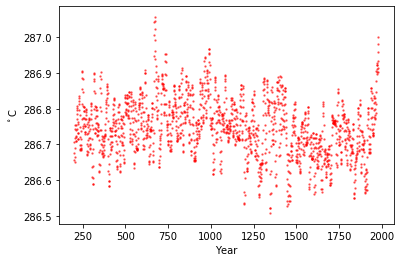

In [13]:
tempkelvinraw = df2.iloc[:,1] + tokelvin
yrsmulti = df2.iloc[:,0] 
plt.scatter(yrsmulti, tempkelvinraw, s=2,color = 'red', alpha = 0.5,marker='o')
plt.xlabel('Year') 
plt.ylabel('$^\circ$C')

In [14]:
tempkelvinraws  = tempkelvinraw[1885 - 200:].reset_index(drop=True)
tempsmooths = tempsmooth[:-32].reset_index(drop=True)

In [15]:
subratctfromtempkelvin = np.mean(tempkelvinraws.subtract(tempsmooths))

In [16]:
yrsall = yrsmulti[:-101].append(thermoyrs)
kelvinall = tempkelvinraw[:-101] - subratctfromtempkelvin
kelvinall = kelvinall.append(thermokelvin)

In [17]:
yrsall = yrsall.reset_index(drop=True)
kelvinall = kelvinall.reset_index(drop=True)

In [18]:
kelvinall[yrsall[yrsall == 1650].index[0]:yrsall[yrsall == 1749].index[0]+1]
len(kelvinall[yrsall[yrsall == 1650].index[0]:yrsall[yrsall == 1749].index[0]+1])

100

In [19]:
tup0 = np.mean(kelvinall[yrsall[yrsall == 1650].index[0]:yrsall[yrsall == 1749].index[0]+1])
tup0

286.6814093939393

Text(0, 0.5, '$^\\circ$C')

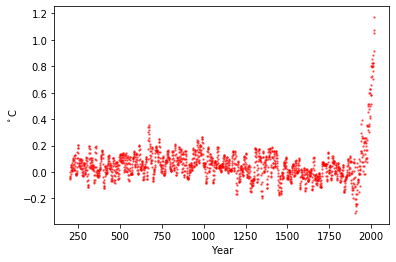

In [20]:
warm = kelvinall - tup0
plt.scatter(yrsall,warm, s=2,color = 'red', alpha = 0.5,marker='o')
plt.xlabel('Year') 
plt.ylabel('$^\circ$C')

In [21]:
years = pd.DataFrame({'Year':yrsall})
warm = pd.DataFrame({'WarmOver1650-1749Ave':warm})
dfout = pd.merge(years,warm, left_index =True, right_index =True,how='outer')

In [22]:
dfout.loc[-1]=['Julian','degreeC']
dfout.index = dfout.index+1
dfout = dfout.sort_index()

dfout.loc[(len(dfout))] = ['2020/04/03','Join Multiproxy and Thermometer.ipynb']
dfout.to_csv(filename + '.csv', index=False)

# References

Schmidt, G., and B. Schmunk. 2017. GISS surface temperature anomaly global-mean monthly, seasonal, and annual means, 1889-present, updated through most recent month, National Aeronautics and Space Administration Goddard Institute for Space Studies, https://data.giss.nasa.gov/gistemp/, accessed 2 January 2018.

Mann, M.E. and P.D. Jones, 2003, Global Surface Temperatures over the Past Two Millennia,Geophysical Research Letters, Vol. 30, No. 15, 1820, August 2003. doi: 10.1029/2003GL017814. Results are deviations from 1961-1990 instrumental mean.

IPCC. 2013. Climate Change 2013: The Physical Science  Basis, Contributions of Working Group ! to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change, Stocker, T., D. Qin, G.-K. Plattner, M. Tignor, S. Allen, J. Boshcung, A. Nauels, Y. Xia, V. Bex, and P. Midgely, eds., Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, 1535pp, with Table AII-1-2, corrected xls-sheets as of 20 August 2014, http://www.climatechange2013.org/, accessed 23 December 2017.